# Lecture 17 - Advanced Plotting III: Color
Aidan Hunt, University of Washington
***

## Learning Objectives
After this lecture, students will be able to:
- Utilize Matplotlib's built-in colormaps, and create custom colormaps
- Apply colorbars to plots and create associated colorbars
- Design colormaps that are well suited for particular data and audiences


## Check-in
- Grading pseudocode outlines now
- HW7 is now optional
- Final assignment updated with "final" questions for HW6 and HW7
- Estimating your grade
***

## Recap
Last time, we wrote code to generate the figure below, demonstrating how to:
- Create grids of points and reshape vectors into matrices
- Use Axes.pcolormesh() and Axes.scatter()
- Format ticks, labels, grids, and titles

Now, we'd like to fix up the color in this figure. Let's use this to motivate a broader discussion of color and how it works in Matplotlib.

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# Load data
fstData = np.loadtxt('freeSurface.txt', delimiter=',')
fstData = np.reshape(fstData, [7, 22, 4], order='F')

# Specify grid parameters
D = 31.5 # Turbine diameter, in cm
w = 78 # Flume width, in cm
dx = D/6 # Grid spacing in x, in cm
dy = w/8 # Grid spacing in y, in cm

# Create x and y vectors
x = np.arange(D/2, 4*D+dx, dx)
y = np.arange(-w/2+dy, w/2, dy)

# Create X and Y grids
X, Y = np.meshgrid(x, y)

(-39.0, 39.0)

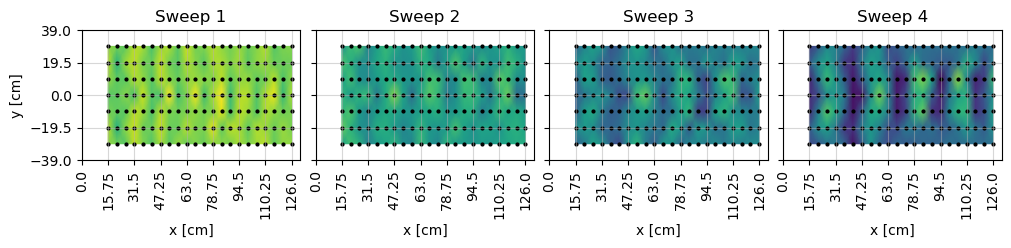

In [4]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[10,3])

xtickVals = np.arange(0, 4*D+D/2, D/2)
ytickVals = np.arange(-w/2, w/2+w/4, w/4)

# Plot on each axes
for i in range(nSweeps):
    # Plot the free surface data
    ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    
    # Plot the grid points
    ax[i].scatter(X, Y, c='k', s=4)
    
    # Set aspect ratio
    ax[i].set_aspect('equal')
    
    # Set x label and title
    ax[i].set_xlabel('x [cm]')
    ax[i].set_title('Sweep ' + str(i+1))

    # Set x and y ticks
    ax[i].set_xticks(xtickVals, labels=xtickVals, rotation='vertical')
    ax[i].set_yticks(ytickVals)
    
    # Turn on the grid
    ax[i].grid(alpha=0.5)

# Set y label of leftmost axis only
ax[0].set_ylabel('y [cm]')

# Set x and y limits
ax[0].set_xlim([0, 4*D+dx])
ax[0].set_ylim([-w/2, w/2])

To work more with colors, we'll import the `matplotlib.colors` module:

In [5]:
import matplotlib.colors as colors

***
## Specifying color

First, let's back up and think of the ways that we can specify specific colors in Matplotlib.

### By name

We've seen that we can use string names for several colors when creating simple plots:

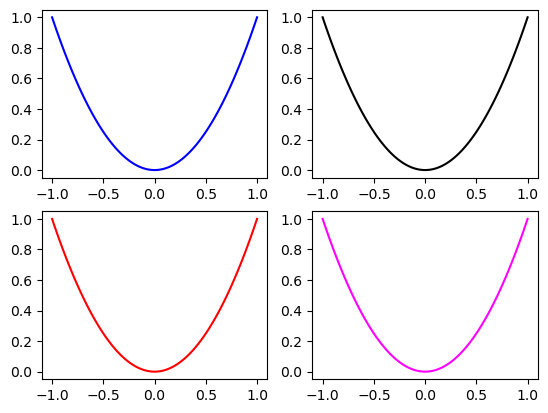

In [8]:
# Create some simple data
x = np.linspace(-1, 1, 100)
y = x**2

fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(x, y, color='blue')
ax[0,1].plot(x, y, color='black')
ax[1,0].plot(x, y, color='red')
ax[1,1].plot(x, y, color='magenta')

We've also seen that, for certain basic colors, there are single-character shorthands for choosing the color (this are documented on the Matplotlib website):

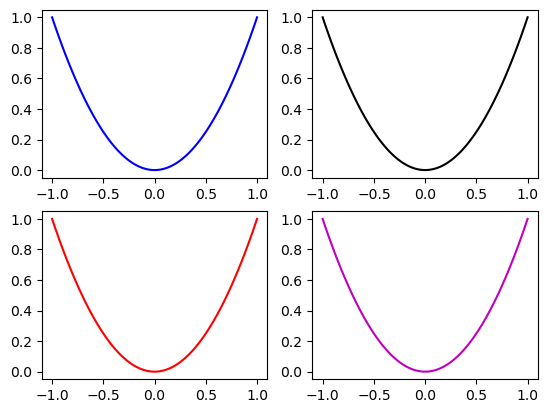

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(x, y, color='b') # Blue
ax[0,1].plot(x, y, color='k') # Black
ax[1,0].plot(x, y, color='r') # Red
ax[1,1].plot(x, y, color='m') # Magenta (note that the hue is slightly different)

Turns out there are a ton of named colors that we can use:

In [12]:
# Get the mapping of named colors to values
allColors = colors.get_named_colors_mapping()
allColors

{'xkcd:cloudy blue': '#acc2d9',
 'xkcd:dark pastel green': '#56ae57',
 'xkcd:dust': '#b2996e',
 'xkcd:electric lime': '#a8ff04',
 'xkcd:fresh green': '#69d84f',
 'xkcd:light eggplant': '#894585',
 'xkcd:nasty green': '#70b23f',
 'xkcd:really light blue': '#d4ffff',
 'xkcd:tea': '#65ab7c',
 'xkcd:warm purple': '#952e8f',
 'xkcd:yellowish tan': '#fcfc81',
 'xkcd:cement': '#a5a391',
 'xkcd:dark grass green': '#388004',
 'xkcd:dusty teal': '#4c9085',
 'xkcd:grey teal': '#5e9b8a',
 'xkcd:macaroni and cheese': '#efb435',
 'xkcd:pinkish tan': '#d99b82',
 'xkcd:spruce': '#0a5f38',
 'xkcd:strong blue': '#0c06f7',
 'xkcd:toxic green': '#61de2a',
 'xkcd:windows blue': '#3778bf',
 'xkcd:blue blue': '#2242c7',
 'xkcd:blue with a hint of purple': '#533cc6',
 'xkcd:booger': '#9bb53c',
 'xkcd:bright sea green': '#05ffa6',
 'xkcd:dark green blue': '#1f6357',
 'xkcd:deep turquoise': '#017374',
 'xkcd:green teal': '#0cb577',
 'xkcd:strong pink': '#ff0789',
 'xkcd:bland': '#afa88b',
 'xkcd:deep aqua': '#0

### By Hex

With the exception of a few colors (the shorthand colors from earlier), all colors above are mapped to a Hex value. This is a base-16 (0-9 + A-F = 16 unique characters) representation for each color. This is commonly used in graphic and web design communicates the amount of red, blue, and green in a particular color.

In [13]:
allColors['fuchsia'] # Hexadecimal representation of fuchsia

'#FF00FF'

For example, let's say that we wanted to make a plot using UW colors (go dawgs). We can find the hex codes for the purple and gold online __[here](https://www.washington.edu/brand/graphic-elements/primary-color-palette/)__.
- Purple: 4b2e83
- Gold: b7a57a
This allows us to match the exact colors of UW across media:

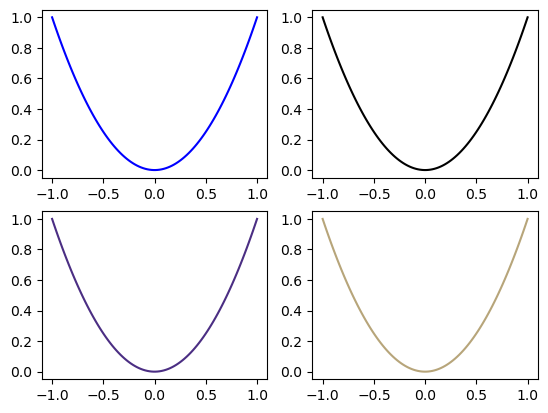

In [137]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(x, y, color='b') # Blue
ax[0,1].plot(x, y, color='k') # Black

uwPurple = '#4b2e83' # UW purple
uwGold = '#b7a57a' # UW Gold

ax[1,0].plot(x, y, color=uwPurple) # UW purple
ax[1,1].plot(x, y, color=uwGold) # UW Gold

### By RGB

At the end of the day, all of these colors are specifying the amount of red, green and blue in the final color. This is represented most-simply as a 1x3 vector of the red contribution, green contribution, and blue contribution, each from 0 to 1.

For example:

In [33]:
# Built-in red, green, blue
print('r:', colors.to_rgb('r'))
print('g:', colors.to_rgb('g')) # Note: (0, 1, 0) is more of a lime green
print('b:', colors.to_rgb('b'))


print('black:', colors.to_rgb('black'))
print('white:', colors.to_rgb('white'))

print('UW purple:', colors.to_rgb('#4b2e83')) # UW purple
print('UW gold:', colors.to_rgb('#b7a57a')) # UW Gold

r: (1.0, 0.0, 0.0)
g: (0.0, 0.5, 0.0)
b: (0.0, 0.0, 1.0)
black: (0.0, 0.0, 0.0)
white: (1.0, 1.0, 1.0)
UW purple: (0.29411764705882354, 0.1803921568627451, 0.5137254901960784)
UW gold: (0.7176470588235294, 0.6470588235294118, 0.47843137254901963)


These RGB codes are the foundations for our **colormaps**, but may be constructed from any of the valid color specifications.

***
## Colormaps

Colormaps link a range of values to a range of colors (specified as these RGB vectors). To access built-in colormaps:

### Built-in colormaps
Just like there are "built-in" colors, there are also "built-in" color maps. To easiest way to access these colormaps is to import `matplotlib` itself, and then access `matplotlib.colormaps`

In [51]:
import matplotlib as mpl

colormaps = mpl.colormaps

print(colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_

Then, to get a particular colormap, use `dict`-like notation:
**Note**: "bad", "over" and "under" are the colors used for values that are invalid (bad) or outside the range of values the colormap maps to.

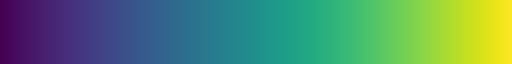

In [91]:
mpl.colormaps['viridis']

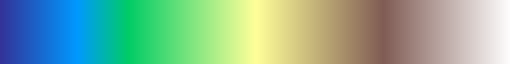

In [92]:
mpl.colormaps['terrain']

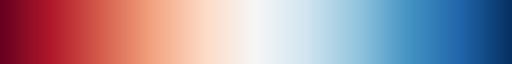

In [93]:
mpl.colormaps['RdBu']

### Side note: alternative way to access built-in colormaps
Alternatively, you may also see folks import `matplotlib.cm`, followed by dot notation or a call to the `get_cmap()` function to access particular colormaps. The `cm` module allows you to "register" your own colormaps so matplotlib remembers them, but otherwise these two approaches are identical.

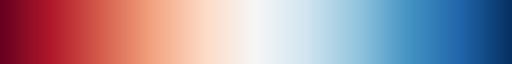

In [115]:
import matplotlib.cm as cm

cm.RdBu

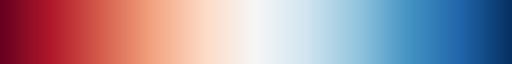

In [116]:
cm.get_cmap('RdBu')

***
## Applying to figures

Let's now return to our plot. How can we apply a particular colormap to our plots?

### Applying to plots
Many plotting functions that are well-suited for colormaps have a parameter, `cmap`, that allows us to set the colormap associated with a particular output. So let's do that in our `pcolormesh()` call! For the colormap in the target plot, we want to use the built-in `hot` map.

(-39.0, 39.0)

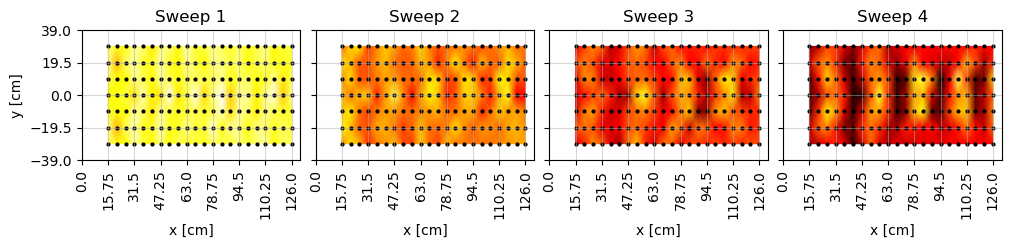

In [69]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[10,3])

xtickVals = np.arange(0, 4*D+D/2, D/2)
ytickVals = np.arange(-w/2, w/2+w/4, w/4)

# Plot on each axes
for i in range(nSweeps):
    # Plot the free surface data (NOW WITH COLORMAP)
    ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     cmap = mpl.colormaps['hot'],
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    
    # Plot the grid points
    ax[i].scatter(X, Y, c='k', s=4)
    
    # Set aspect ratio
    ax[i].set_aspect('equal')
    
    # Set x label and title
    ax[i].set_xlabel('x [cm]')
    ax[i].set_title('Sweep ' + str(i+1))

    # Set x and y ticks
    ax[i].set_xticks(xtickVals, labels=xtickVals, rotation='vertical')
    ax[i].set_yticks(ytickVals)
    
    # Turn on the grid
    ax[i].grid(alpha=0.5)
    
# Set y label of leftmost axis only
ax[0].set_ylabel('y [cm]')

# Set x and y limits
ax[0].set_xlim([0, 4*D+dx])
ax[0].set_ylim([-w/2, w/2])

### Adding colorbars
Now, to add a colorbar, we can create one with the `fig.colorbar` command. Notes on syntax:
- The first argument is a `ScalarMappable`: basically an Artist that a colormap can represent. In this case, it should be the output of our `pcolormesh` function call.
- The `ax` argument is which Axes in our figure the colormap will "steal space from". In other words, which Axes (one or multiple) the colorbar will sit next to. 
- The `location` argument specifies the position of the colorbar, as a string. Some examples are `top`, `bottom`, `left`, `right`.

Let's catch the last pcolormesh created in a variable called `mesh`, and add a call to fig.colorbar at the bottom of the script:

(-39.0, 39.0)

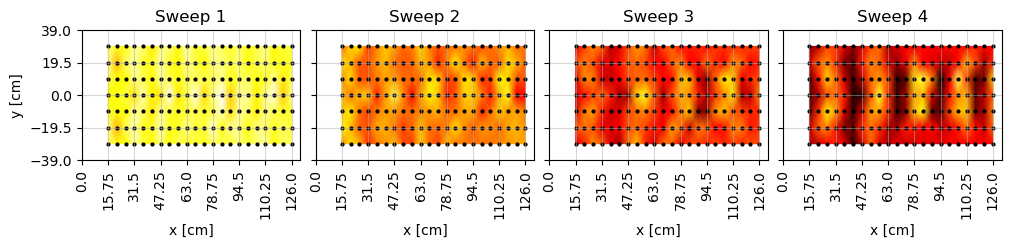

In [80]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[10,3])

xtickVals = np.arange(0, 4*D+D/2, D/2)
ytickVals = np.arange(-w/2, w/2+w/4, w/4)

# Plot on each axes
for i in range(nSweeps):
    # Plot the free surface data (NOW WITH COLORMAP)
    mesh = ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     cmap = mpl.colormaps['hot'],
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    
    # Plot the grid points
    ax[i].scatter(X, Y, c='k', s=4)
    
    # Set aspect ratio
    ax[i].set_aspect('equal')
    
    # Set x label and title
    ax[i].set_xlabel('x [cm]')
    ax[i].set_title('Sweep ' + str(i+1))

    # Set x and y ticks
    ax[i].set_xticks(xtickVals, labels=xtickVals, rotation='vertical')
    ax[i].set_yticks(ytickVals)
    
    # Turn on the grid
    ax[i].grid(alpha=0.5)
    
# Set y label of leftmost axis only
ax[0].set_ylabel('y [cm]')

# Set x and y limits
ax[0].set_xlim([0, 4*D+dx])
ax[0].set_ylim([-w/2, w/2])

Just like everything else, the colorbar is an `Artist` object and has properties that we can set when creating it or after the fact. Let's set the label:

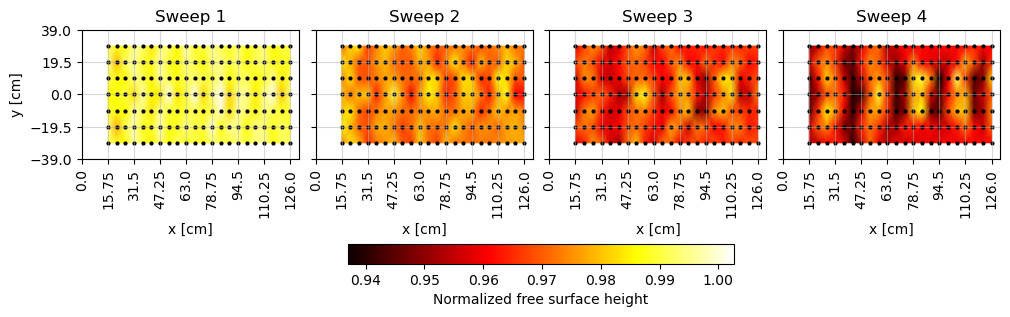

In [81]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[10,3])

xtickVals = np.arange(0, 4*D+D/2, D/2)
ytickVals = np.arange(-w/2, w/2+w/4, w/4)

# Plot on each axes
for i in range(nSweeps):
    # Plot the free surface data (NOW WITH COLORMAP)
    mesh = ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     cmap = mpl.colormaps['hot'],
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    
    # Plot the grid points
    ax[i].scatter(X, Y, c='k', s=4)
    
    # Set aspect ratio
    ax[i].set_aspect('equal')
    
    # Set x label and title
    ax[i].set_xlabel('x [cm]')
    ax[i].set_title('Sweep ' + str(i+1))

    # Set x and y ticks
    ax[i].set_xticks(xtickVals, labels=xtickVals, rotation='vertical')
    ax[i].set_yticks(ytickVals)
    
    # Turn on the grid
    ax[i].grid(alpha=0.5)
    
# Set y label of leftmost axis only
ax[0].set_ylabel('y [cm]')

# Set x and y limits
ax[0].set_xlim([0, 4*D+dx])
ax[0].set_ylim([-w/2, w/2])

cbar = fig.colorbar(mesh, ax=ax, location='bottom', label='Normalized free surface height')
# Alternatively, could set as cbar.set_label('Normalized free surface height')

**Our figure now completely matches the target output!**

## Creating custom colormaps

We can get pretty far with built-in colormaps, but we can create our own too. To make our own colormaps, we need to understand the types of colormap objects that exist in matplotlib:

### `ListedColormaps`
`ListedColormaps` are colormaps that consist of a **list of colors that map to a range of values**. These maps are well-suited for representing discrete values.

For example, consider the default colormap, `viridis`.

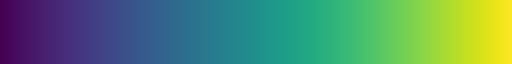

In [140]:
cmap = cm.get_cmap('viridis')
cmap

In [118]:
type(cmap)

matplotlib.colors.ListedColormap

We can view the colors that underly this colormap using the `.colors` attribute. By default, this is an array of 256 RGB triplets.

In [103]:
cmap.colors

[[0.267004, 0.004874, 0.329415],
 [0.26851, 0.009605, 0.335427],
 [0.269944, 0.014625, 0.341379],
 [0.271305, 0.019942, 0.347269],
 [0.272594, 0.025563, 0.353093],
 [0.273809, 0.031497, 0.358853],
 [0.274952, 0.037752, 0.364543],
 [0.276022, 0.044167, 0.370164],
 [0.277018, 0.050344, 0.375715],
 [0.277941, 0.056324, 0.381191],
 [0.278791, 0.062145, 0.386592],
 [0.279566, 0.067836, 0.391917],
 [0.280267, 0.073417, 0.397163],
 [0.280894, 0.078907, 0.402329],
 [0.281446, 0.08432, 0.407414],
 [0.281924, 0.089666, 0.412415],
 [0.282327, 0.094955, 0.417331],
 [0.282656, 0.100196, 0.42216],
 [0.28291, 0.105393, 0.426902],
 [0.283091, 0.110553, 0.431554],
 [0.283197, 0.11568, 0.436115],
 [0.283229, 0.120777, 0.440584],
 [0.283187, 0.125848, 0.44496],
 [0.283072, 0.130895, 0.449241],
 [0.282884, 0.13592, 0.453427],
 [0.282623, 0.140926, 0.457517],
 [0.28229, 0.145912, 0.46151],
 [0.281887, 0.150881, 0.465405],
 [0.281412, 0.155834, 0.469201],
 [0.280868, 0.160771, 0.472899],
 [0.280255, 0.16569

If we want a discretized version of this colormap, we can get one using by supplying a second argument to `cm.get_cmap`. For example, a viridis map that spans 8 values instead of 256:

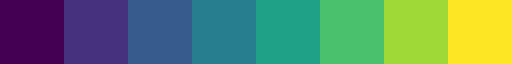

In [142]:
cmap = cm.get_cmap('viridis', 8)
cmap

In [143]:
cmap.colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ],
       [0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ],
       [0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ],
       [0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

You can get a particular value in the colormap by providing a number between 0 and `len(cmap.colors)`. Non-integer values are interpolated via nearest neighbor.

In [144]:
print('First color:', cmap(0)) # The first color
print('Second color:', cmap(1)) # The second color
print('Color at 7.6', cmap(7.6)) # Nearest neighbor interpolation

First color: (0.267004, 0.004874, 0.329415, 1.0)
Second color: (0.275191, 0.194905, 0.496005, 1.0)
Color at 7.6 (0.993248, 0.906157, 0.143936, 1.0)


We can create such a colormap simply by providing a list of colors to `matplotlib.colors.ListeColormap()`. Let's use our UW colors again:

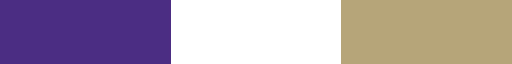

In [157]:
customMap = colors.ListedColormap([uwPurple, 'white', uwGold], name='goDawgs')
customMap

In [145]:
customMap.colors

['#4b2e83', 'white', '#b7a57a']

### `LinearSegmentedColormaps`

In contrast, `LinearSegmentedColormaps` linearly interpolate between "anchor" colors. This is a continuous verison of the `ListedColormap` (basically, a list of infinite colors).

An example is the built in `RdBu` colormap, which interpolates between red and white, and white and blue:

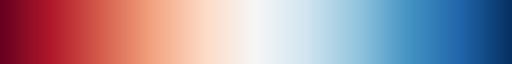

In [147]:
cmap = cm.get_cmap('RdBu')
cmap

In [148]:
type(cmap)

matplotlib.colors.LinearSegmentedColormap

We can create such a colormap from a list of names like before (note that `name` is a required argument now for some reason):

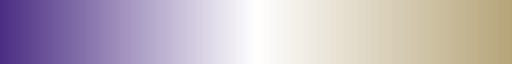

In [156]:
customMap = colors.LinearSegmentedColormap.from_list('goDawgs', [uwPurple, 'white', uwGold])
customMap

Let's use it in our figure by creating the colormap outside of the loop, then using it each time we call pcolormesh

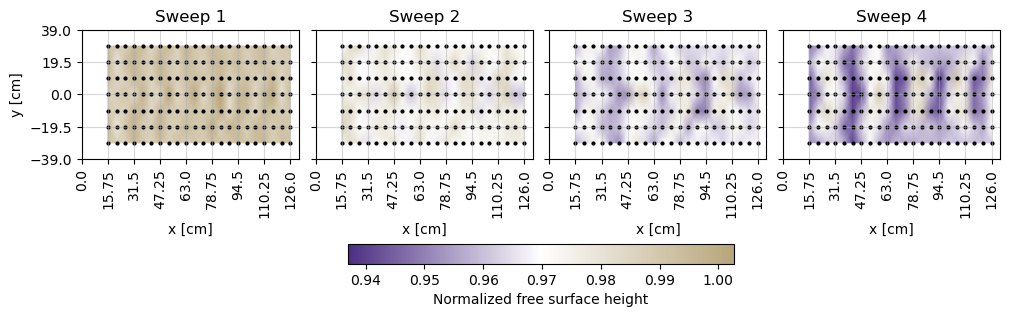

In [158]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[10,3])

xtickVals = np.arange(0, 4*D+D/2, D/2)
ytickVals = np.arange(-w/2, w/2+w/4, w/4)

goDawgs = colors.LinearSegmentedColormap.from_list('goDawgs',  [uwPurple, 'white', uwGold])

# Plot on each axes
for i in range(nSweeps):
    # Plot the free surface data (NOW WITH COLORMAP)
    mesh = ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     cmap = goDawgs,
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    
    # Plot the grid points
    ax[i].scatter(X, Y, c='k', s=4)
    
    # Set aspect ratio
    ax[i].set_aspect('equal')
    
    # Set x label and title
    ax[i].set_xlabel('x [cm]')
    ax[i].set_title('Sweep ' + str(i+1))

    # Set x and y ticks
    ax[i].set_xticks(xtickVals, labels=xtickVals, rotation='vertical')
    ax[i].set_yticks(ytickVals)
    
    # Turn on the grid
    ax[i].grid(alpha=0.5)
    
# Set y label of leftmost axis only
ax[0].set_ylabel('y [cm]')

# Set x and y limits
ax[0].set_xlim([0, 4*D+dx])
ax[0].set_ylim([-w/2, w/2])

cbar = fig.colorbar(mesh, ax=ax, location='bottom', label='Normalized free surface height')
# Alternatively, could set as cbar.set_label('Normalized free surface height')

***
## Choosing/designing colormaps

So which colormaps do we use? A few things to consider:

### Types of colormaps

We should pick colormaps that match our data. We can divide colormaps into several categories.

#### Sequential: A continuous progression of color from one "end" to another
- Good for data that is increasing/decreasing in one direction
- Built-in examples: viridis, plasma, hot, etc

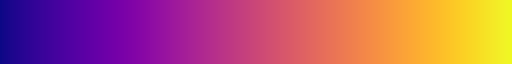

In [164]:
cm.get_cmap('plasma')

#### Diverging: A colormap of two colors that meet in the middle at a "neutral" color
- Good for data that is symmetric about 0 or some center value.
- Good for characterizing fluctuations, oscillations, positives and negatives
- Built-in examples: RdBu, PuOr, etc

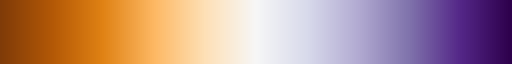

In [165]:
cm.get_cmap('PuOr')

#### Cyclic: Maximum and minimum colors are the same
- Good for periodic data
- Built-in examples: twilight

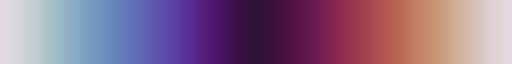

In [166]:
cm.get_cmap('twilight')

#### Categorical
- Good for data that doesn't have an intrinsic order to it
- Example: default plotting colors (e.g., tab10)

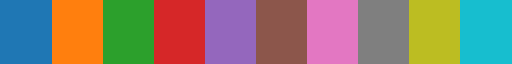

In [167]:
cm.get_cmap('tab10')

### Accessibility
We also want to make sure that our colormaps allow our data to be seen and understood by all people. We should balance contrast with considering those with some degree of colorblindness. Some general guidelines.
- Avoid the rainbow colormap. It's tempting to use but leaves much room for confusion. __[Check out this article on why we continue to use it even though we shouldn't.](https://www.kennethmoreland.com/color-advice/BadColorMaps.pdf)__
- Use available tools to help choose good colormaps that are accessible and highlight your data well.
    - __[Color blindness simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/)__
    - __[Color brewer](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)__